# Replication - Baseline Hazard Figure

Here we provide a notebook to replicate the simulation draws for the baseline hazard. 


The notebook replicates the results in:
- /out/simulation/figures/baseline_hazard.eps

The main script can be found at: 
- /scripts/simulation/baseline_hazard.py



In [1]:
!pip3 install probcox 

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 614kB 2.8MB/s 
  Created wheel for probcox: filename=probcox-0.0.5-cp37-none-any.whl size=5226 sha256=1fbea93d20db823427f1d8724b2be43ead4160196d4f2511a4b51c269b989d65
  Stored in directory: /root/.cache/pip/wheels/7a/ed/e5/71cb95c54c96702f1412114114806c74394f421b6cbda6af70
Successfully built probcox


In [4]:
# Modules
# =======================================================================================================================

import os
import sys
import shutil
import subprocess
import tqdm

import numpy as np
import pandas as pd

import torch
from torch.distributions import constraints

import pyro
import pyro.distributions as dist

from pyro.infer import SVI, Trace_ELBO

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import probcox as pcox

dtype = torch.FloatTensor

np.random.seed(43)
torch.manual_seed(43)


In [8]:
# Plot Settings
# =======================================================================================================================

plt.rcParams['text.usetex'] = False
plt.rcParams['font.size'] = 10
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False


In [9]:
# Simulation Settings
# =======================================================================================================================

TVC = pcox.TVC(theta=None, P_binary=0, P_continuous=0, dtype=dtype)


100%|██████████| 20/20 [00:00<00:00, 511.30it/s]


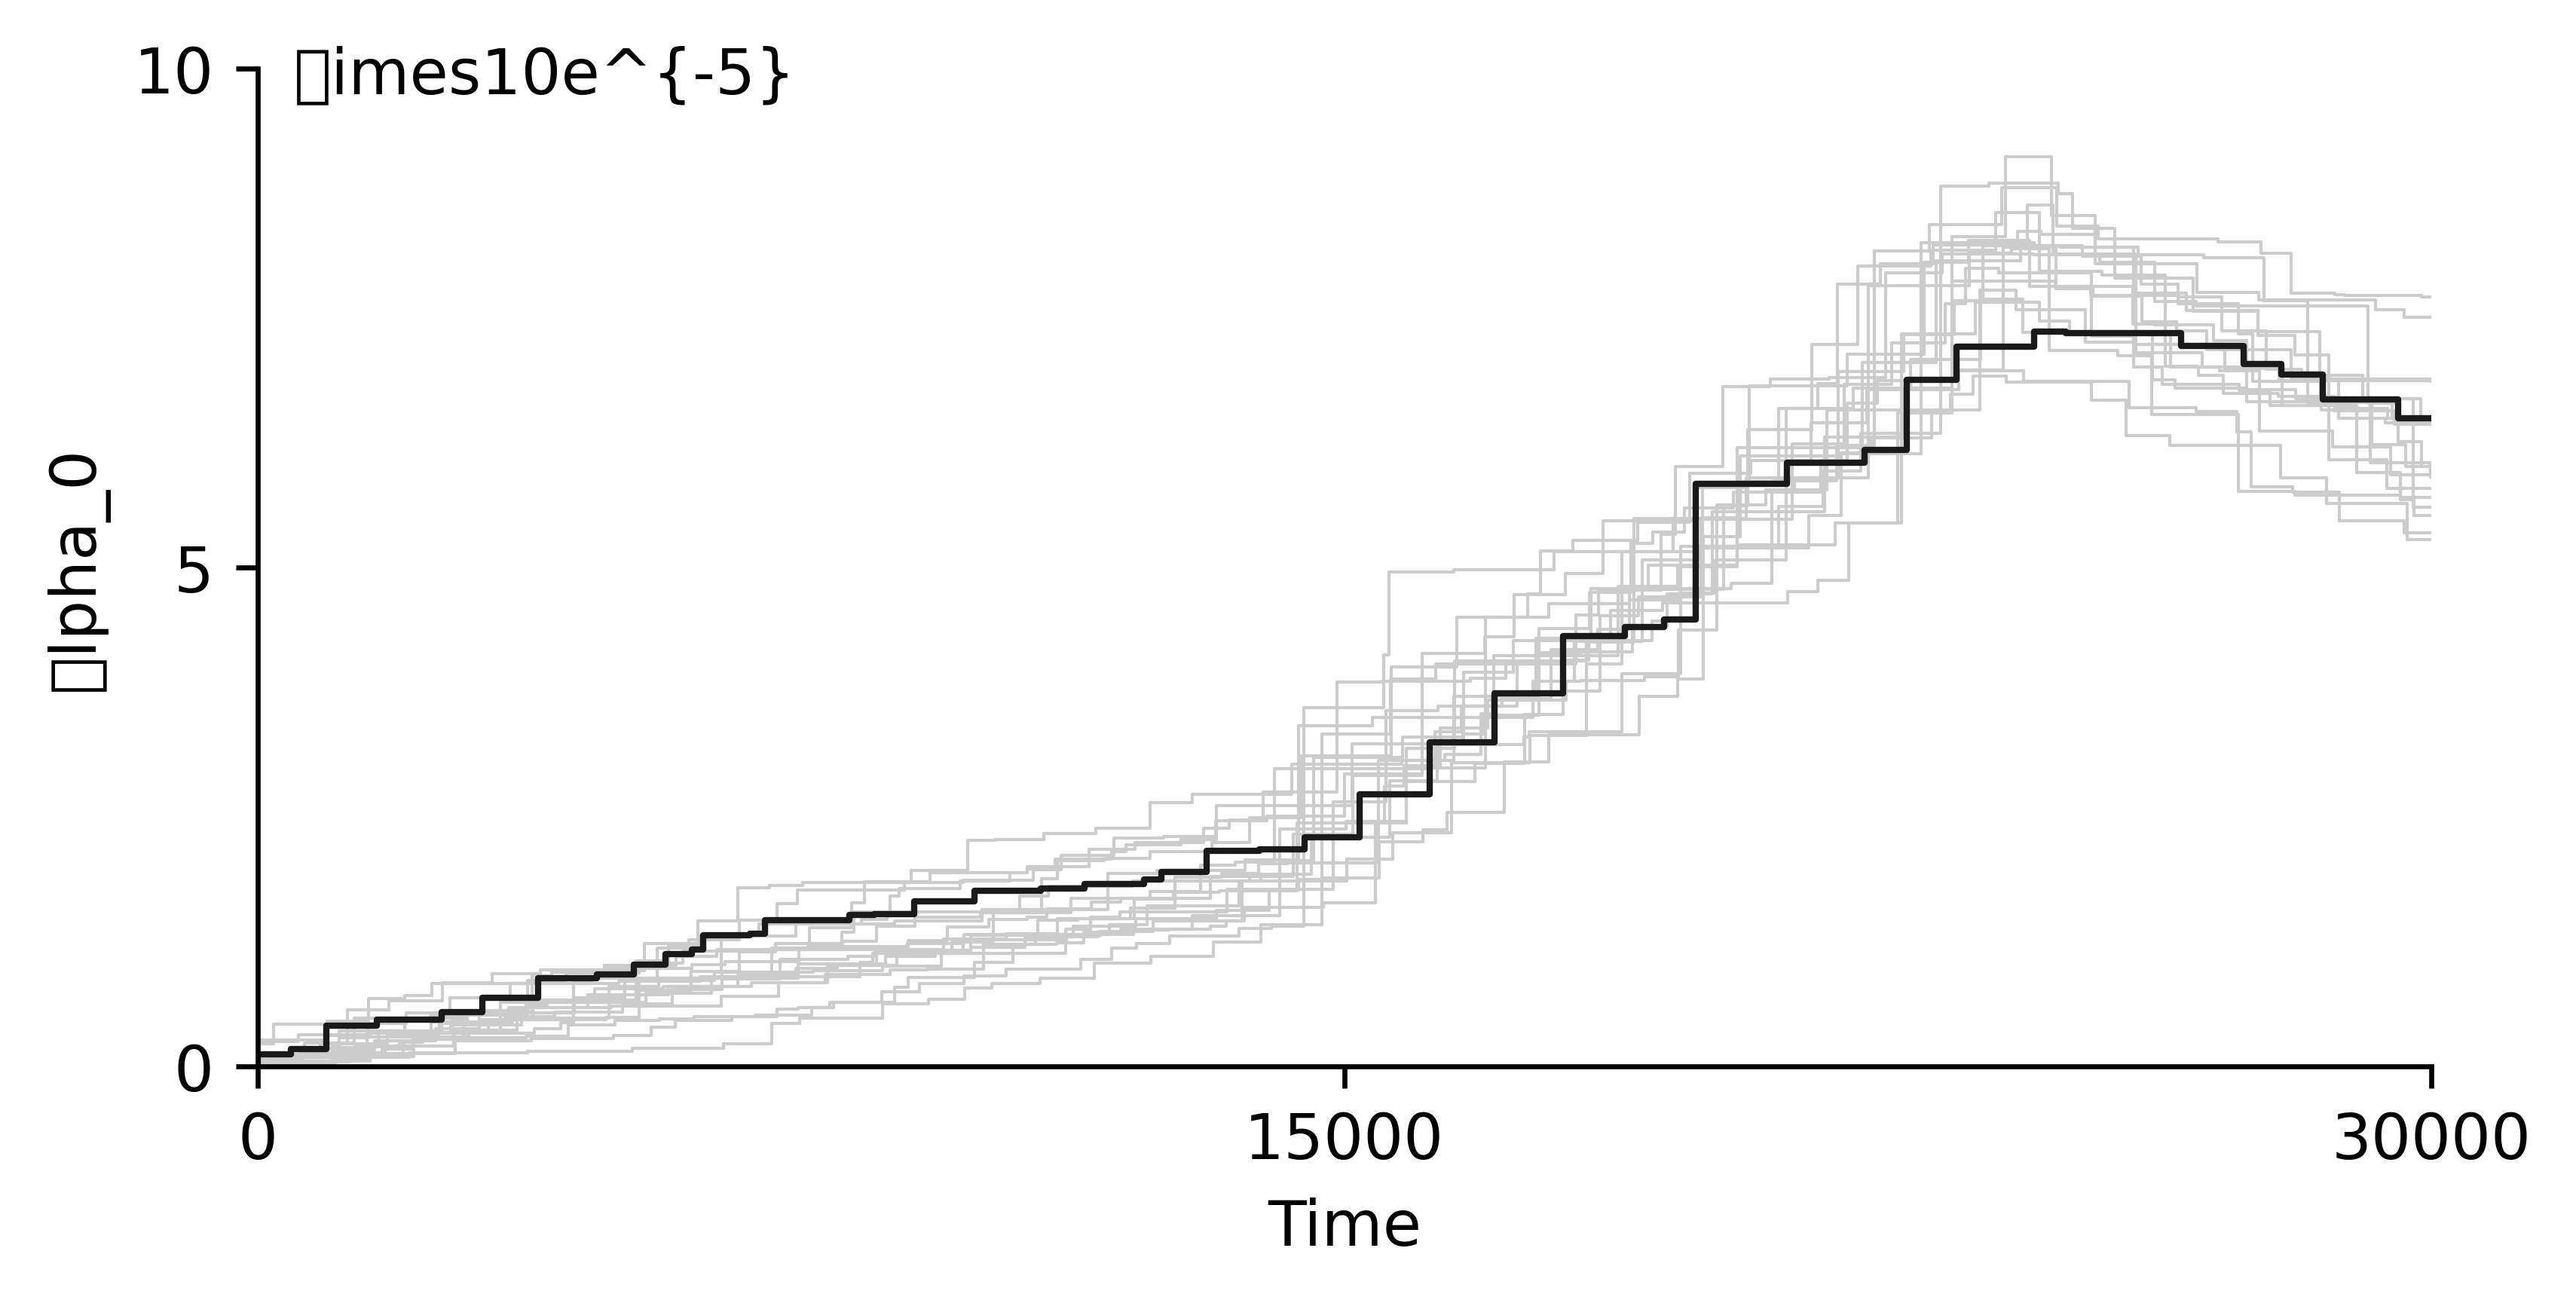

In [11]:
# Plot
# =======================================================================================================================

np.random.seed(1)
torch.manual_seed(1)
fig, ax = plt.subplots(figsize=((8.27)*0.75, (11.69/4)), dpi=600)
for _ in tqdm.tqdm(range(20)):
    TVC.make_lambda0(scale=1)
    a, b = TVC.return_lambda0()
    ax.step(a, b, color='.8', linewidth=0.5)
    ax.ticklabel_format(axis='y', style='sci')
ax.step(a, b, color='.1', linewidth=1, linestyle='-')
ax.set_xlabel('Time')
ax.set_ylabel("\alpha_0")
ax.set_yticks([0, 0.00005, 0.0001])
ax.set_yticklabels([0, 5, 10])
ax.set_ylim([0, 0.0001])
ax.set_xticks([0, 15000, 30000])
ax.set_xlim([0, 30000])
ax.text(500, 0.00009760, '\times10e^{-5}')
plt.show()
plt.close()